# MLP and NeuMF RecSys using Keras Embedding Layer

This notebook contains an implementation of Collaborative Filtering using Neral Networks and Deep Learning architectures. The model aims to make accurate video game recommendations to users of the Playstation 4 based on their previour reviews and ratings.

The models will be built using the Keras Library

Keras Documentation : https://keras.io

The user review data used in this notebook has been obtained from a popular video game review site called Metacritic.

## Data Preprocessing and Preparation of Test set

In [1]:
# from __future__ import print_function
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.models import load_model

Importing the train, validation and test sets. The dataset has been split using the same method explained in the SVD model and saved here.

In [2]:
trainset = pd.read_csv("trainset.csv")
validset = pd.read_csv("validset.csv")
testset = pd.read_csv("testset.csv")

All of the data imported has already been split in a 80:10:10 ratio in the appropriate manner with the trainset having at least one rating from every user and every game. Mean normalization and feature scaling have also been applied to these sets. 

In addition, the user and game encodings have also been added to the datasets in separate columns.

In [3]:
trainset.head()

,User_Name,Game_Name,Rating,User_Enc,Game_Enc
0,User 293,Red Dead Redemption 2,1.0,0,0
1,User 801,Red Dead Redemption 2,0.1,1,0
2,User 1120,Red Dead Redemption 2,1.0,2,0
3,User 2314,Red Dead Redemption 2,1.0,3,0
4,User 2869,Red Dead Redemption 2,0.9,4,0


In [4]:
validset.head()

,User_Name,Game_Name,Rating,User_Enc,Game_Enc
0,User 1249,Red Dead Redemption 2,0.0,17,0
1,User 2873,Red Dead Redemption 2,1.0,45,0
2,User 2836,Red Dead Redemption 2,0.9,46,0
3,User 705,Red Dead Redemption 2,1.0,72,0
4,User 1849,Red Dead Redemption 2,0.9,81,0


In [5]:
testset.head()

,User_Name,Game_Name,Rating,User_Enc,Game_Enc
0,User 67,Red Dead Redemption 2,0.5,16,0
1,User 939,Red Dead Redemption 2,1.0,21,0
2,User 2940,Red Dead Redemption 2,0.9,29,0
3,User 82,Red Dead Redemption 2,0.5,35,0
4,User 2203,Red Dead Redemption 2,0.9,55,0


Assigning unique encodings to each user and game in the dataset. This is required in order to create the user and game embeddings using keras.

In [6]:
#Splitting the model test set into X_test(inputs) and y_test(outputs)
X_test = testset[["User_Enc", "Game_Enc"]]
y_test = testset[["Rating"]]

In [7]:
X_test.head()

,User_Enc,Game_Enc
0,16,0
1,21,0
2,29,0
3,35,0
4,55,0


In [8]:
y_test.head()

,Rating
0,0.5
1,1.0
2,0.9
3,0.5
4,0.9


# Multi-Layer Perceptron(MLP) Model for Collaborative Filtering

HyperParameters to tune:

-> Number of embeddings for each user

-> Number of embeddings for each game

-> Hidden Layer count 

-> Neuron Count per hidden layer

-> Parameter initialization method

-> L2 Regularization for embeddings

-> Dropout value per layer

-> Hidden layer activations

-> Output layer activation

-> Optimizer (SGD, Adam)

-> Learning rate for optimizer (and momentum if SGD or RMSprop)

The number of iterations for convergence need not be specified since I will be using keras callbacks to log the results and stop training when validation loss stops decreasing.

Since there are several hyperparameters to tune, I have used a library called hyperas to train the model for different combinations of hyperparameters and have saved the MLP model that returned the lowest validation error. The optimization has been carried out in a separate python file called "MLP_hyperasTune.py" under the optimization folder. Running this file will carry out a random search over the specified ranges and choices of hyperparameters and return the best model found during the run. The script also saves the run logs so you can visualize the learning curves of all the optimization runs to check out which model produced the best results. Some of these optimization logs have also been included in the repository.

### Visualizing optimization runs using Tensorboard

Run the following commands to start a tensorboard server and open the relevant log files to visualize.

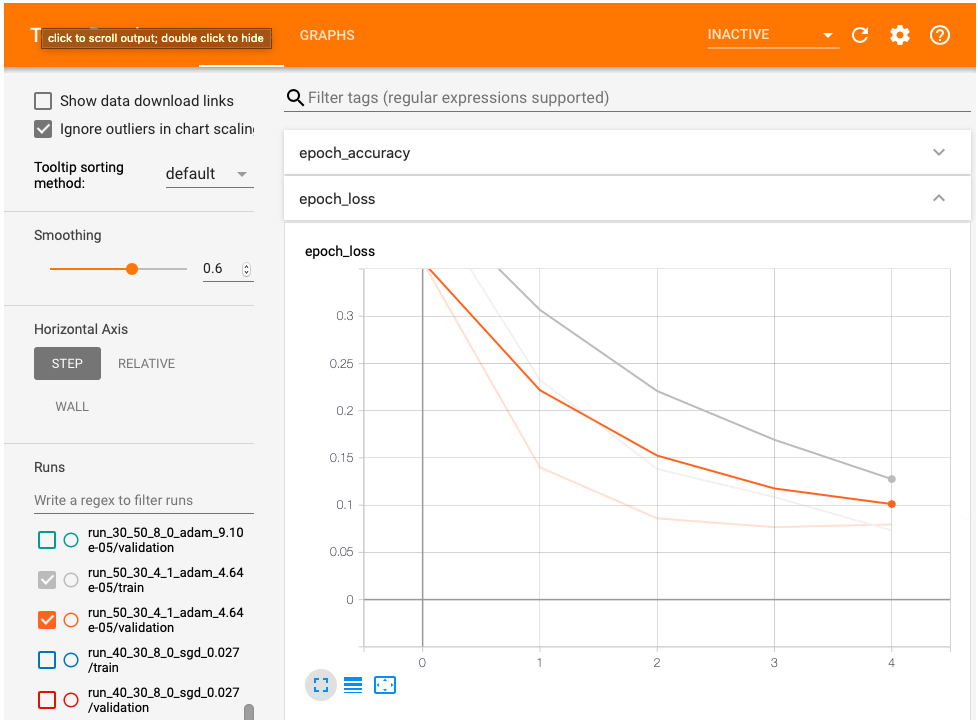

In [39]:
#Check out the readme in the optimization folder for more details on how to use tensorboard.

%load_ext tensorboard
%tensorboard --logdir=./mlp_run_logs --port=6006

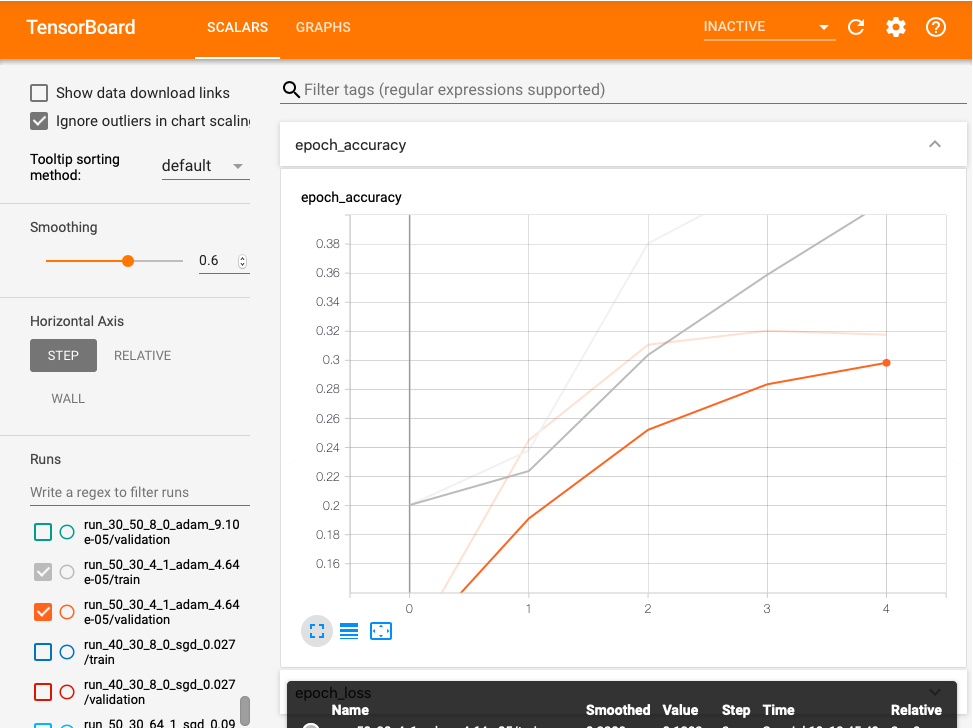

In [29]:
#Shutting down the tensorboard server
!kill

You may notice that in all of these models, the trainset accuracy is always higher than the validation accuracy. This is because early stopping is enabled and training is stopped before overfitting occurs. If the training had continued beyond this point, the trainset error would be miniscule, while the validation error would shoot up, this indicating the inability of the model to generalize well to new data.

### Importing the best MLP model found during optimization

In [9]:
#Loading the model
mlp_model = load_model("MLP_RecSys_Model.h5")

In [10]:
#Model architecture summary
mlp_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Game_Name_Input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
User_Name_Input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Game_Embeddings (Embedding)     (None, 1, 40)        68920       Game_Name_Input[0][0]            
__________________________________________________________________________________________________
User_Embeddings (Embedding)     (None, 1, 40)        4533560     User_Name_Input[0][0]            
____________________________________________________________________________________________

## Reporting testset accuracy using the MLP model

In [11]:
mse = mlp_model.evaluate([X_test.Game_Enc, X_test.User_Enc], y_test.Rating)[0]
print("Test Set Error (RMSE): ", mse ** 0.5)

241/241 [==============================] - 3s 10ms/step - loss: 0.0762 - accuracy: 0.3381
Test Set Error (RMSE):  0.2760819219830846


#### We get an RMSE of about 0.276 (may vary due to random initialization of train and test sets) which corresponds to an MSE of 0.0762.

These results show no improvement over the results produced by the matrix factorization models.

The hyperparameters have been tuned to give the best performance for the specified architecture. The only architecural modification that was explored in the optmization process was the addition of more dense layers and neurons in the model. It is entirely possible that there exists an architecture that could slightly improve the results, given the same data.

## Scope of imporvement:

-> Again, one way to improve the results would be to get more user rating data. 

-> The model can also be improved is by retrieving the review timestamp and the review text. With the user text data in hand, we can use Natural Language processing(NLP) to filter out the spam reviews and improve the recommendations. 

-> With the user rating timestamp in hand, we can implement Recurrent Neural Networks(RNN's). RNN's are very useful when dealing with time series or sequential data. In our case, it will improve recommendations by providing the model with a sequential aspect of evaluation of the data which does not exist without the timestamps.

-> The last method (which I will implement below) is to combine the matrix factorization and MLP models to produce better results.

Implementing the above improvements could potentially make the model better than the Matrix Factorization models as the surprise package does not provide a way to incorporate user review text and timestamp data.

# Neural Matrix Factorization (NeuMF) Model for Collaborative Filtering

The neural matrix factorization model consists of two sections; the matrix factorization section and the MLP section. The outputs from these two sections of the model are combined to produce results.

Hyperparamters to tune:

-> The same hyperparamters specified for the MLP model

-> Number of user and game embeddings for the matrix factorization section. The user and game embeddings should be the same number in this case because matrix factorization involves taking the dot product of the embeddings. Hence the matrices need to be compatible.

-> Number of dense layers after concatenation of outputs from the two sections.

-> Number of neurons per dense layer ater concatenation of outputs from the two sections.

Note that the MLP and MF sections of the model will not be sharing the same embeddings. The two sections will have their own sets of embeddings to work with.

Again, these hyperparameters have been tuned using hyperas and optimization logs have been saved.

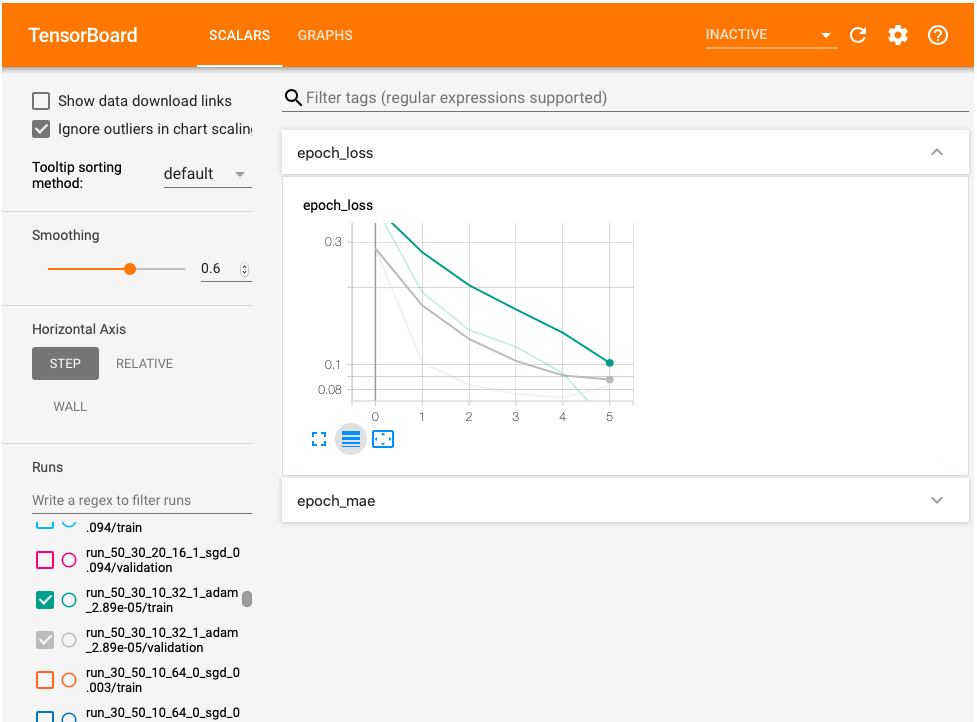

In [41]:
#Visualizing the NeuMF optimization logs using tensorboard

%load_ext tensorboard
%tensorboard --logdir=./neuMF_run_logs --port=6006

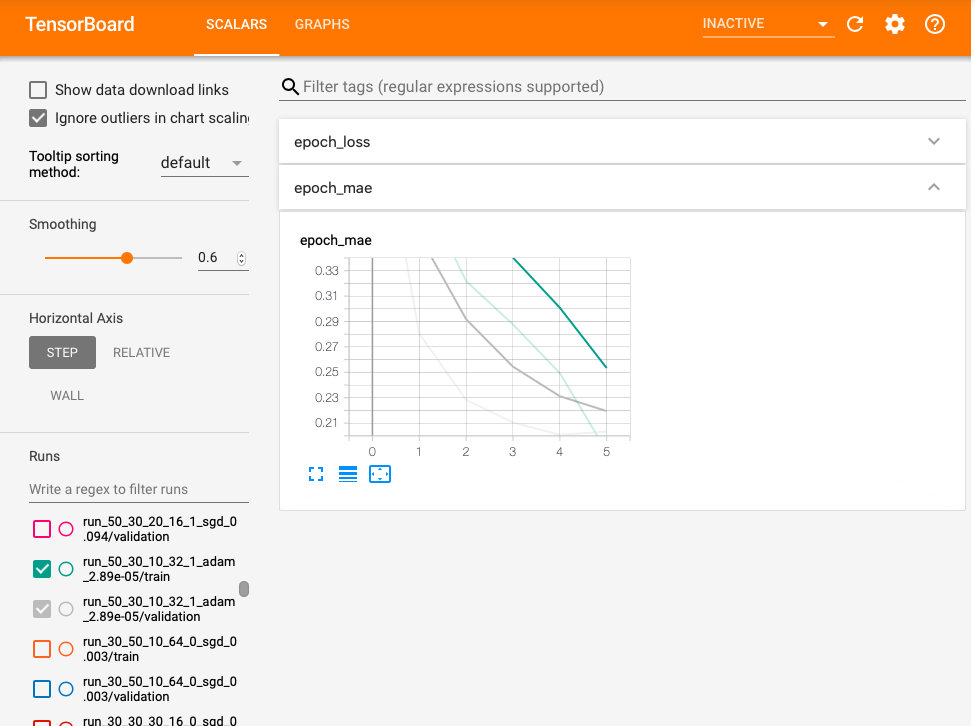

In [31]:
#Shutting down the tensorboard server
!kill

kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


### Importing the best NeuMF Model found during Optimization

In [12]:
#Importing the model
neuMF_model = load_model("NeuMF_RecSys_Model.h5")

In [13]:
#Model Architecture summary
neuMF_model.summary()

Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Game_Name_Input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
User_Name_Input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Game_Embeddings_MLP (Embedding) (None, 1, 40)        68920       Game_Name_Input[0][0]            
__________________________________________________________________________________________________
User_Embeddings_MLP (Embedding) (None, 1, 30)        3400170     User_Name_Input[0][0]            
___________________________________________________________________________________________

## Reporting testset accuracy using NeuMF Model

In [14]:
mse = neuMF_model.evaluate([X_test.Game_Enc, X_test.User_Enc], y_test.Rating)[0]
print("Test Set Error (RMSE): ", mse ** 0.5)

241/241 [==============================] - 2s 10ms/step - loss: 0.0751 - mean_absolute_error: 0.2072
Test Set Error (RMSE):  0.2740228654307609


#### We get an RMSE of about 0.274 which corresponds to an MSE of 0.0751, which is a slight improvement over the previous model but is not very significant. 

Again, there may be a different architecture that could improve the results slightly. However, the only ways to create a significant improvement is to implement NLP and RNN's as I had mentioned earlier. NLP and RNN's are something I will work on implementing in the future.